## Lexy Feldmann<br>Professor Metzger<br>DSC680 Applied Data Science

### Load in Libraries and the Depression Dataset

#### Load libraries

In [55]:
# Insert the necessary libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

#### Load depression dataset

In [56]:
# Read in the student depression dataset from Github and store in a dataframe variable called 'student_depression'
student_depression = pd.read_csv('https://raw.githubusercontent.com/lexyfeldmann/applieddatascience/refs/heads/main/student_depression_dataset.csv')

# Print the first five rows of the table to ensure it loaded correctly
student_depression.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


### Exploratory Data Analysis

#### Looking at the depression status column and how many are depressed vs. not

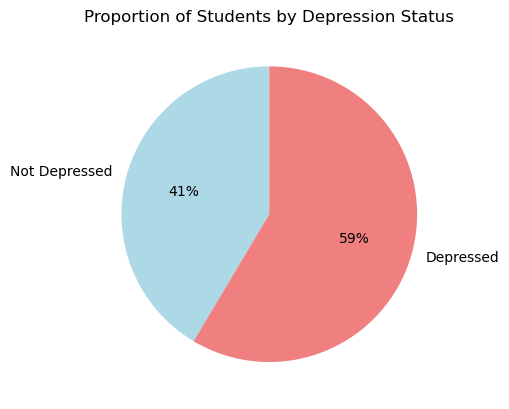

In [57]:
# Count the number of 0s and 1s in the Depression column
depression_counts = student_depression['Depression'].value_counts().sort_index()

# Create the labels
labels = ['Not Depressed', 'Depressed']

# Set the values to be the count of each group
values = depression_counts.values

# Set pretty colors for each group
colors = ['lightblue', 'lightcoral']

# Plot the pie chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)

# Add a title to the chart
plt.title('Proportion of Students by Depression Status')

# Show the graph
plt.show()

#### Looking at the Sleep Duration column to see what proportion of each group is depressed

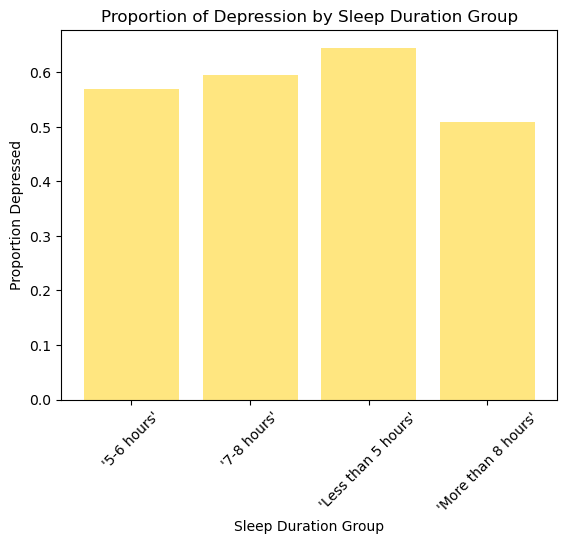

In [58]:
# Grab the mean for the Depression column and group by the Sleep Duration column to get the mean for every group size
depressionbysleep = student_depression.groupby('Sleep Duration')['Depression'].mean()

# Drop the 'Others' category as there were only 18 individuals in this group
depressionbysleep = depressionbysleep[depressionbysleep.index != 'Others']

# Set the labels to be the index of each depressionbysleep value
labels = depressionbysleep.index

# Set the values to be the mean of each depressionbysleep value
values = depressionbysleep.values

# Plot the data and add labels + yellow color
plt.bar(labels, values, color='#FFE680')

# Add a title
plt.title('Proportion of Depression by Sleep Duration Group')

# Add x and y labels
plt.ylabel('Proportion Depressed')
plt.xlabel('Sleep Duration Group')

# Rotate the x axis labels so they fit properly
plt.xticks(rotation=45)

# Show the graph
plt.show()

#### Looking at the Dietary Habits column to see what proportion of each group is depressed

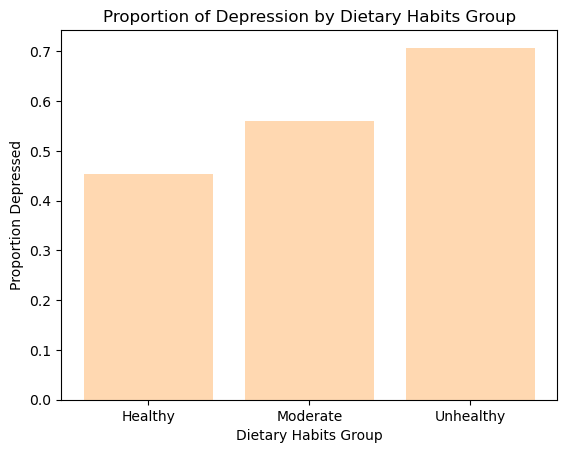

In [59]:
# Grab the mean for the Depression column and group by the Dietary Habits column to get the mean for every group size
depression_by_dietaryhabits = student_depression.groupby('Dietary Habits')['Depression'].mean()

# Drop the 'Others' category as there were only 12 individuals in this group
depression_by_dietaryhabits = depression_by_dietaryhabits[depression_by_dietaryhabits.index != 'Others']

# Set the labels to be the index of each depression_by_dietaryhabits value
labels = depression_by_dietaryhabits.index

# Set the values to be the mean of each depression_by_dietaryhabits value
values = depression_by_dietaryhabits.values

# Plot the data and add labels + orange color
plt.bar(labels, values, color='#FFD8B1')

# Add a title
plt.title('Proportion of Depression by Dietary Habits Group')

# Add x and y axis labels
plt.ylabel('Proportion Depressed')
plt.xlabel('Dietary Habits Group')

# Show the graph
plt.show()

#### Looking at the Academic Pressure column to see what proportion of each group is depressed

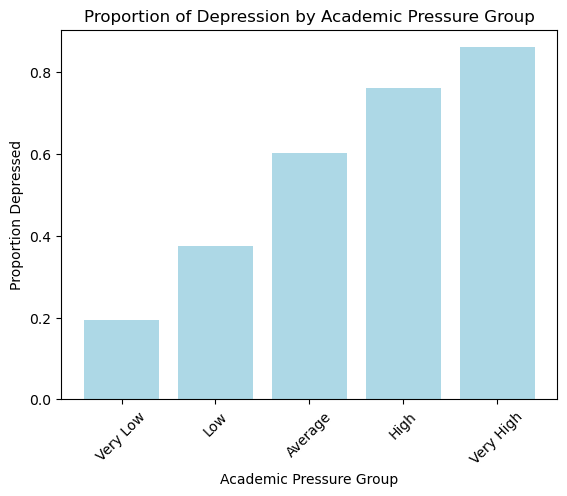

In [60]:
# Grab the mean for the Depression column and group by the Academic Pressure column to get the mean for every group size
depression_by_academicpressure = student_depression.groupby('Academic Pressure')['Depression'].mean().sort_index() 

# Drop the 0 category as there were only 9 individuals in this group
depression_by_academicpressure = depression_by_academicpressure[depression_by_academicpressure.index != 0]

# Give values in Academic Pressure column a text label, that way it makes more visual sense
pressure_labels = {
    1: 'Very Low',
    2: 'Low',
    3: 'Average',
    4: 'High',
    5: 'Very High'
}

# Set the labels to be the index of each depressionbysleep value and give it the descriptive labels
labels = depression_by_academicpressure.index.map(pressure_labels)

# Set the values to be the mean of each depressionbysleep value
values = depression_by_academicpressure.values

# Plot the data and add labels + blue color
plt.bar(labels, values, color='#ADD8E6')

# Add a title
plt.title('Proportion of Depression by Academic Pressure Group')

# Add x and y labels
plt.ylabel('Proportion Depressed')
plt.xlabel('Academic Pressure Group')

# Rotate the x axis lables so they fit properly
plt.xticks(rotation=45)

# Show the graph
plt.show()

#### Looking at the Study Satisfaction column to see what proportion of each group is depressed

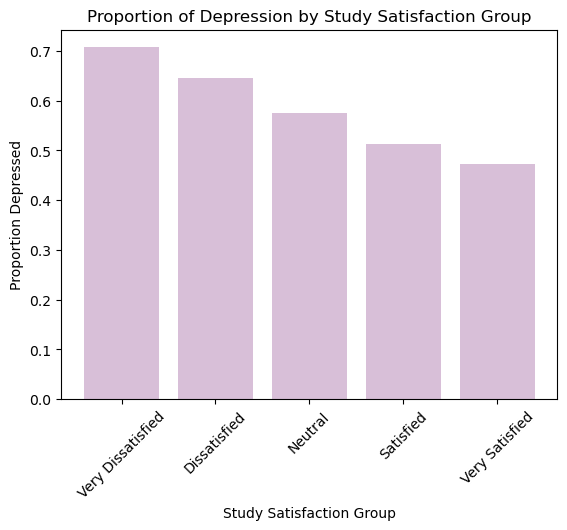

In [61]:
# Grab the mean for the Depression column and group by the Study Satisfaction column to get the mean for every group size
depression_by_studysatisfaction = student_depression.groupby('Study Satisfaction')['Depression'].mean().sort_index()

# Drop the 0 category as there were only ten individuals in this group
depression_by_studysatisfaction = depression_by_studysatisfaction[depression_by_studysatisfaction.index != 0]

# Give values in Study Satisfaction column a text label, so that it makes more visual sense in the graph
satisfaction_labels = {
    1: 'Very Dissatisfied',
    2: 'Dissatisfied',
    3: 'Neutral',
    4: 'Satisfied',
    5: 'Very Satisfied'
}

# Set the labels to be the index of each depression_by_studysatisfaction value and give it the descriptive labels
labels = depression_by_studysatisfaction.index.map(satisfaction_labels)

# Set the values to be the mean of each depression_by_studysatisfaction value
values = depression_by_studysatisfaction.values

# Plot the data and add labels + purple color
plt.bar(labels, values, color='#D8BFD8')

# Add a title
plt.title('Proportion of Depression by Study Satisfaction Group')

# Add x and y axis labels
plt.ylabel('Proportion Depressed')
plt.xlabel('Study Satisfaction Group')

# Rotate x axis labels to fit properly
plt.xticks(rotation=45)

# Show the graph
plt.show()

#### Looking at the Financial Stress column to see what proportion of each group is depressed

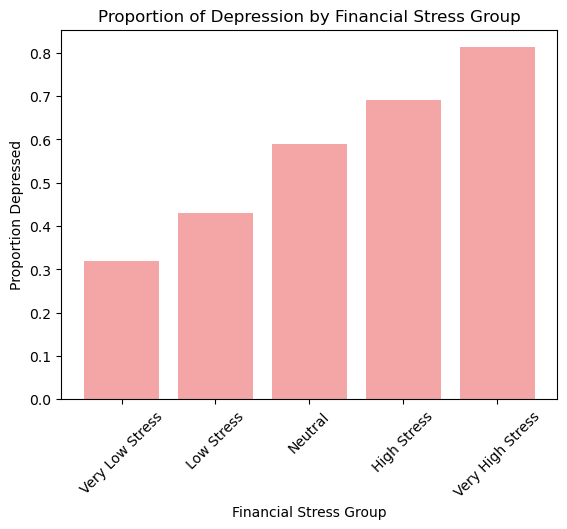

In [62]:
# Convert Financial Stress column to numeric
student_depression['Financial Stress'] = pd.to_numeric(student_depression['Financial Stress'], errors='coerce')

# Grab the mean for the Depression column and group by the Financial Stress column to get the mean for every group size
depression_by_financialstress = student_depression.groupby('Financial Stress')['Depression'].mean().sort_index()

# Give values in Study Satisfaction column text labels, so it makes more visual sense in the graphs
stress_labels = {
    1: 'Very Low Stress',
    2: 'Low Stress',
    3: 'Neutral',
    4: 'High Stress',
    5: 'Very High Stress'
}

# Set the labels to be the index of each depression_by_financialstress value and give it the descriptive labels
labels = depression_by_financialstress.index.map(stress_labels)

# Set the values to be the mean of each depression_by_financialstress value
values = depression_by_financialstress.values

# Plot the data and add labels + pink color
plt.bar(labels, values, color='#F4A6A6')

# Add a title
plt.title('Proportion of Depression by Financial Stress Group')

# Add x and y axis labels
plt.ylabel('Proportion Depressed')
plt.xlabel('Financial Stress Group')

# Rotate x axis labels to fit properly
plt.xticks(rotation=45)

# Show the graph
plt.show()

#### Looking at the Suicidal Thoughts column to see what proportion of each group is depressed

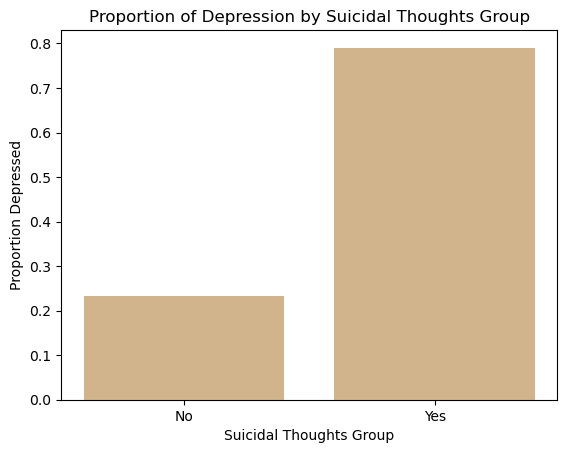

In [63]:
# Grab the mean for the Depression column and group by the suicidal column to get the mean for every group size
depression_by_suicidal = student_depression.groupby('Have you ever had suicidal thoughts ?')['Depression'].mean()

# Set the labels to be the index of each depression_by_suicidal value
labels = depression_by_suicidal.index

# Set the values to be the mean of each depression_by_suicidal value
values = depression_by_suicidal.values

# Plot the data and add labels + brown color
plt.bar(labels, values, color='#D2B48C')

# Add a title
plt.title('Proportion of Depression by Suicidal Thoughts Group')

# Add x and y axis labels
plt.ylabel('Proportion Depressed')
plt.xlabel('Suicidal Thoughts Group')

# Show the graph
plt.show()

### Cleaning the Dataset for Modeling

#### Drop unnecessary features

In [64]:
# Drop unnecessary features from student_depression
student_depression = student_depression.drop(['id', 'City', 'Profession', 'CGPA', 'Degree'], axis=1, errors='ignore')

# Print the dataframe to view the changes
student_depression.head()

,Gender,Age,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,0.0,2.0,0.0,'5-6 hours',Healthy,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,0.0,5.0,0.0,'5-6 hours',Moderate,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,0.0,5.0,0.0,'Less than 5 hours',Healthy,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,0.0,2.0,0.0,'7-8 hours',Moderate,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,0.0,3.0,0.0,'5-6 hours',Moderate,Yes,1.0,1.0,No,0


#### Remove NaN values

In [65]:
# Remove any row from the dataset where there is a NaN value
student_depression = student_depression.dropna()

#### Make specific columns categorical

In [66]:
# Make the column Academic Pressure a categorical column by making it type string
student_depression['Academic Pressure'] = student_depression['Academic Pressure'].astype(str)

# Make the column Work Pressure a categorical column by making it type string
student_depression['Work Pressure'] = student_depression['Work Pressure'].astype(str)

# Make the column Study Satisfaction a categorical column by making it type string
student_depression['Study Satisfaction'] = student_depression['Study Satisfaction'].astype(str)

# Make the column Job Satisfaction a categorical column by making it type string
student_depression['Job Satisfaction'] = student_depression['Job Satisfaction'].astype(str)

# Make the column Work/Study Hours a categorical column by making it type string
student_depression['Work/Study Hours'] = student_depression['Work/Study Hours'].astype(str)

# Make the column Financial Stress a categorical column by making it type string
student_depression['Financial Stress'] = student_depression['Financial Stress'].astype(str)

#### Create dummy variables for categorical columns

In [67]:
# Create dummy variables for gender
student_depression = pd.get_dummies(student_depression, columns=['Gender'], drop_first=True)

# Create dummy variables for sleepduration
student_depression = pd.get_dummies(student_depression, columns=['Sleep Duration'], drop_first=True)

# Create dummy variables for dietary habits
student_depression = pd.get_dummies(student_depression, columns=['Dietary Habits'], drop_first=True)

# Create dummy variables for suicidal thoughts
student_depression = pd.get_dummies(student_depression, columns=['Have you ever had suicidal thoughts ?'], drop_first=True)

# Create dummy variables for family history
student_depression = pd.get_dummies(student_depression, columns=['Family History of Mental Illness'], drop_first=True)

# Create dummy variables for academic pressure
student_depression = pd.get_dummies(student_depression, columns=['Academic Pressure'], drop_first=True)

# Create dummy variables for work pressure
student_depression = pd.get_dummies(student_depression, columns=['Work Pressure'], drop_first=True)

# Create dummy variables for study satisfaction
student_depression = pd.get_dummies(student_depression, columns=['Study Satisfaction'], drop_first=True)

# Create dummy variables for job satisfaction
student_depression = pd.get_dummies(student_depression, columns=['Job Satisfaction'], drop_first=True)

# Create dummy variables for work/study hours
student_depression = pd.get_dummies(student_depression, columns=['Work/Study Hours'], drop_first=True)

# Create dummy variables for financial stress
student_depression = pd.get_dummies(student_depression, columns=['Financial Stress'], drop_first=True)

In [68]:
# Print the first five rows to view those changes
student_depression.head()

,Age,Depression,Gender_Male,Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',Sleep Duration_'More than 8 hours',Sleep Duration_Others,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,...,Work/Study Hours_4.0,Work/Study Hours_5.0,Work/Study Hours_6.0,Work/Study Hours_7.0,Work/Study Hours_8.0,Work/Study Hours_9.0,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0
0,33.0,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,24.0,0,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,31.0,0,True,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,28.0,1,False,True,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
4,25.0,0,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


### Get Training and Test Data Ready for Modeling

#### Split data into training and test data

In [69]:
# Grab the features of the data, which are all columns except for Depression
features = student_depression.drop('Depression', axis=1)

# Grab the target column (Depression) of the data
target = student_depression['Depression']

# Split the data into 80% training and 20% testing
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Begin Training a Logistic Regression Model

#### Logistic Regression Model

In [70]:
# Create pipeline object with StandardScaler (to make sure features are standardizes) and LogisticRegression with
# class_weight = balanced to account for the imbalance of the Depression column
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight='balanced')
)

# Train the model using the training data and store into linear_regression variable
logistic_regression = pipeline.fit(features_train, target_train)

#### Grabbing model accuracy

In [71]:
# Evaluate the model's accuracy using the test data and store in accuracy variable
accuracy = logistic_regression.score(features_test, target_test)

# Print the accuracy score of the model
print("Model accuracy:", accuracy)

Model accuracy: 0.8492831541218638


#### Classification Report based on the predictions of the model

In [72]:
# Predict the labels for the test set
predictions = logistic_regression.predict(features_test)

# Create the classification report and store it in 'report' variable
report = classification_report(target_test, predictions)

# Print the classification report to see how well the model performed
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      2348
           1       0.87      0.87      0.87      3232

    accuracy                           0.85      5580
   macro avg       0.85      0.85      0.85      5580
weighted avg       0.85      0.85      0.85      5580



#### Create a confusion matrix

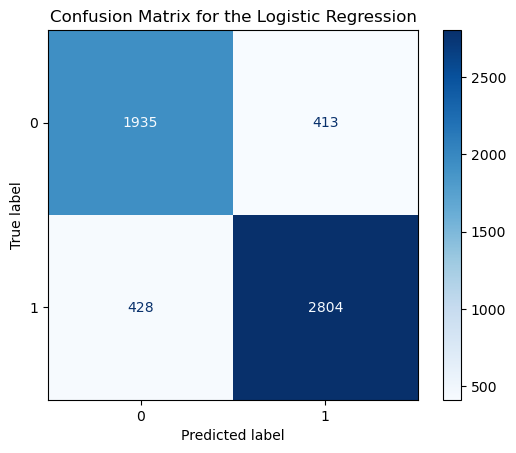

In [73]:
# Create a confusion matrix for the predictions
conf_mat = confusion_matrix(target_test, predictions)

# Plot the confusion matrix
pretty_matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat)

# Display the plot with pink colors
pretty_matrix.plot(cmap='Blues')

# Add a title to the plot
plt.title('Confusion Matrix for the Logistic Regression')

# Show the matrix
plt.show()

#### Create a table to view the coefficients of the features

In [74]:
# Grab the logistic regression model from the pipeline
logreg_model = logistic_regression.named_steps['logisticregression']

# Get the coefficients and feature names and store in coefficients variable
coefficients = logreg_model.coef_[0]

# Get the names of the features and store in feature_names
feature_names = features_train.columns

# Create a DataFrame to display the coefficient values along with which feature it is (the feature name)
coefficient_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Print the first 5 rows of the dataframe to confirm it worked
coefficient_df.head()

,Feature,Coefficient
0,Age,-0.542771
1,Gender_Male,-0.003081
2,Sleep Duration_'7-8 hours',-0.004259
3,Sleep Duration_'Less than 5 hours',0.150699
4,Sleep Duration_'More than 8 hours',-0.108695


#### Graph the features and their coefficients

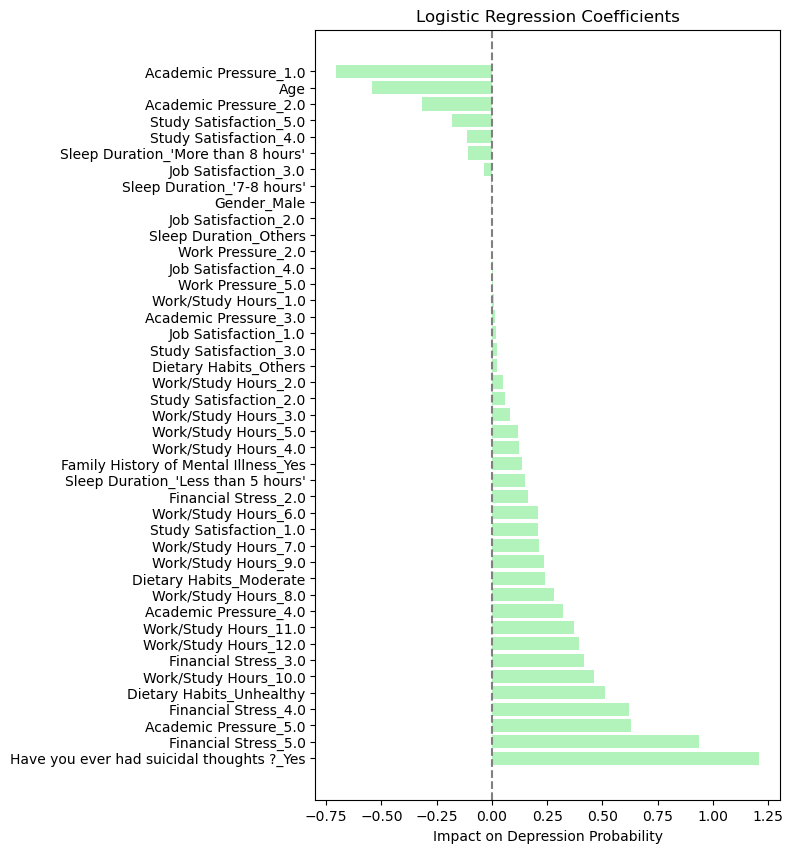

In [75]:
# Sort the coefficient_df in descending order to prepare for visualizing
coefficient_df = coefficient_df.sort_values('Coefficient', ascending=False)

# Set a larger plot size
plt.figure(figsize=(6, 10))

# Create bar visual where the x axis is the coefficient value and the y axis are the features, set color to green
plt.barh(coefficient_df['Feature'], coefficient_df['Coefficient'], color='#B2F2BB')

# Set the vertical line for the x axis at 0, color to gray, and the line to be dashed. This will make it easier to see which
# features have a positive or negative coefficient
plt.axvline(x=0, color='gray', linestyle='--')

# Add a title to the graph
plt.title('Logistic Regression Coefficients')

# Add an x axis label
plt.xlabel('Impact on Depression Probability')

# Show the graph
plt.show()

#### Creating odds ratios from coefficients

In [76]:
# Convert my coefficients to odds ratios for easier interpretation
coefficient_df['Odds Ratio'] = np.exp(coefficient_df['Coefficient'])

# Sort by Odds Ratio in descending order and print all 43
coefficient_df.sort_values(by='Odds Ratio', ascending=False).head(43)

,Feature,Coefficient,Odds Ratio
9,Have you ever had suicidal thoughts ?_Yes,1.209095,3.350452
42,Financial Stress_5.0,0.939291,2.558168
15,Academic Pressure_5.0,0.630899,1.879299
41,Financial Stress_4.0,0.619760,1.858481
8,Dietary Habits_Unhealthy,0.513406,1.670973
28,Work/Study Hours_10.0,0.462077,1.587368
40,Financial Stress_3.0,0.414769,1.514020
30,Work/Study Hours_12.0,0.392668,1.480927
29,Work/Study Hours_11.0,0.371183,1.449449
14,Academic Pressure_4.0,0.319881,1.376964


### Begin Training a Gradient Boosting Classifier

#### Set up the pipeline, parameters and GridSearchCV

In [77]:
# Define pipeline for the gradient boosting classifier, where the features are standardized using standardscaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier(random_state=42))
])

# Set up some parameters to test with to (hopefully) improve
param_grid = {
    'gb__n_estimators': [50, 100, 200], # number of trees
    'gb__learning_rate': [0.01, 0.1, 0.2], # how much each tree will correct the previous one
    'gb__max_depth': [3, 4, 5], # how deep each tree can go
    'gb__min_samples_split': [2, 5, 10] # how big a group will be for a split to happen
}

# Set up GridSearchCV which will try different combinations of all paremeters mentioned above. It will score each using the
# F1 score, and use 5 fold cross validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5
)

#### Fit to GridSearchCV

In [78]:
# Fit the training data to the GridSearchCV option
grid_search.fit(features_train, target_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('gb',
                                        GradientBoostingClassifier(random_state=42))]),
             param_grid={'gb__learning_rate': [0.01, 0.1, 0.2],
                         'gb__max_depth': [3, 4, 5],
                         'gb__min_samples_split': [2, 5, 10],
                         'gb__n_estimators': [50, 100, 200]},
             scoring='f1')

#### Find best parameters and best model

In [79]:
# Get the best parameters and print them
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Use the best model to predict on test set
best_model = grid_search.best_estimator_

Best Parameters: {'gb__learning_rate': 0.2, 'gb__max_depth': 3, 'gb__min_samples_split': 2, 'gb__n_estimators': 100}
Best F1 Score: 0.871307626564256


#### Get the predictions and evaluate model performance

In [80]:
# Get the predictions
gb_predictions = best_model.predict(features_test)

# Evaluate the performance of the model using a classification report
print(classification_report(target_test, gb_predictions))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      2348
           1       0.85      0.90      0.87      3232

    accuracy                           0.85      5580
   macro avg       0.85      0.84      0.84      5580
weighted avg       0.85      0.85      0.85      5580



#### Create a confusion matrix

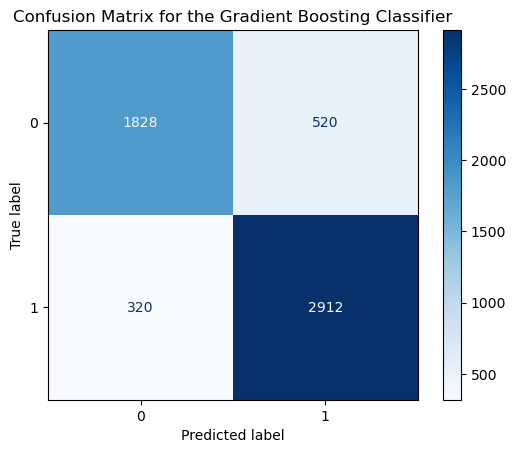

In [81]:
# Create a confusion matrix for the predictions
conf_mat = confusion_matrix(target_test, gb_predictions)

# Plot the confusion matrix
pretty_matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat)

# Display the plot with pink colors
pretty_matrix.plot(cmap='Blues')

# Add a title to the plot
plt.title('Confusion Matrix for the Gradient Boosting Classifier')

# Show the matrix
plt.show()

#### Getting feature importances to compare to Logistic Regression coefficients

In [82]:
# Grab the gradient boosting model from the pipeline and store in gb_model variable
gb_model = best_model.named_steps['gb']

# Get the feature names and store in feature_names variable
feature_names = features.columns

# Get feature importances from the model
importances = gb_model.feature_importances_

# Make a dataframe called gb_importances and set each feature to its respective importance, then sorting in descending order
gb_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display all the features with their importance values
gb_importances.head(43)

,Feature,Importance
9,Have you ever had suicidal thoughts ?_Yes,0.528749
11,Academic Pressure_1.0,0.109536
15,Academic Pressure_5.0,0.071134
42,Financial Stress_5.0,0.061640
0,Age,0.052006
12,Academic Pressure_2.0,0.035118
14,Academic Pressure_4.0,0.029553
41,Financial Stress_4.0,0.024634
8,Dietary Habits_Unhealthy,0.021850
40,Financial Stress_3.0,0.015065


#### Put importance values and logistic regression coefficients in a table to compare

In [83]:
# Compare logistic regression and gradientboosting model coefficients by merging the dataframes on feature name
combined = pd.merge(coefficient_df, gb_importances, on='Feature')

# Sort the combined table by importance in descending order
combined = combined.sort_values(by='Importance', ascending=False)

# Show all features/importances with their odds ratios
combined.head(43)

,Feature,Coefficient,Odds Ratio,Importance
0,Have you ever had suicidal thoughts ?_Yes,1.209095,3.350452,0.528749
42,Academic Pressure_1.0,-0.704005,0.494600,0.109536
2,Academic Pressure_5.0,0.630899,1.879299,0.071134
1,Financial Stress_5.0,0.939291,2.558168,0.061640
41,Age,-0.542771,0.581136,0.052006
40,Academic Pressure_2.0,-0.315200,0.729643,0.035118
9,Academic Pressure_4.0,0.319881,1.376964,0.029553
3,Financial Stress_4.0,0.619760,1.858481,0.024634
4,Dietary Habits_Unhealthy,0.513406,1.670973,0.021850
6,Financial Stress_3.0,0.414769,1.514020,0.015065


### Evaluating Interactions Between Features

#### Generate interactions

In [84]:
# Generate interactions only with 2-way interactions (column pairs)
polyfeat = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Create all interactions from my features and create a new matrix with all columns
interactions = polyfeat.fit_transform(features)

# Grab names of new columns to know which were combined
interaction_names = polyfeat.get_feature_names_out(features.columns)

# Add these interactions and their names to a new dataframe called interactions_df
interactions_df = pd.DataFrame(interactions, columns=interaction_names)

In [85]:
# Print the dataframe to view
interactions_df.head()

,Age,Gender_Male,Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',Sleep Duration_'More than 8 hours',Sleep Duration_Others,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Have you ever had suicidal thoughts ?_Yes,...,Work/Study Hours_9.0 Financial Stress_2.0,Work/Study Hours_9.0 Financial Stress_3.0,Work/Study Hours_9.0 Financial Stress_4.0,Work/Study Hours_9.0 Financial Stress_5.0,Financial Stress_2.0 Financial Stress_3.0,Financial Stress_2.0 Financial Stress_4.0,Financial Stress_2.0 Financial Stress_5.0,Financial Stress_3.0 Financial Stress_4.0,Financial Stress_3.0 Financial Stress_5.0,Financial Stress_4.0 Financial Stress_5.0
0,33.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Identifying interaction columns and adding Depression column to DataFrame

In [86]:
# Add the depression column to the interactions_df
interactions_df['Depression'] = student_depression['Depression'].values

# Create an empty list to hold the interaction columns
interaction_columns = []

# Loop through the columns and find the ones that are the interaction columns, they should have two underscores in their
# name. Then add them to the interaction_columns array
for col in interactions_df.columns:
    if col.count('_') == 2:
        interaction_columns.append(col)

#### Calculating the mean depression rate for each interaction

In [87]:
# Create a new list called results
results = []

# For each interaction feature, only look at where interactions occured and add that column to a subset
for col in interaction_columns:
    subset = interactions_df[interactions_df[col] == 1]
    # Loop through the subset, and calculate how many are depressed
    if not subset.empty:
        mean_depression = subset['Depression'].mean()
        # Count how many students had this interaction
        n = subset.shape[0]
        # Create new dictionary to hold all the new data
        entry = {}
        # Add the interaction column, mean depression column, and n column (with their values), and append this to the results list
        entry['Interaction'] = col
        entry['Mean_Depression'] = mean_depression
        entry['N'] = n
        results.append(entry)

#### Create dataframe of results, then sort by Mean_Depression and filter by N size

In [88]:
# Convert the results list to a dataframe
results_df = pd.DataFrame(results)

# Sort the dataframe by the Mean_Depression column in descending order
results_df = results_df.sort_values(by='Mean_Depression', ascending=False)

# Filter for interactions with and N size of greater than 50 to ensure meaningful results
filtered_interactions = results_df[results_df['N'] > 50]

#### Look at high and low Mean_Depression for these interactions

In [89]:
# Grab the rows in the dataset where Mean_Depression is greater than or equal to 0.8 and store in high_mean df
high_mean = filtered_interactions[(filtered_interactions['Mean_Depression'] >= 0.8)]

# Show the first 50 rows of those with a high_mean
high_mean.head(50)

,Interaction,Mean_Depression,N
418,Academic Pressure_5.0 Financial Stress_5.0,0.954167,1920
256,Have you ever had suicidal thoughts ?_Yes Acad...,0.945259,4841
282,Have you ever had suicidal thoughts ?_Yes Fina...,0.918175,5084
398,Academic Pressure_5.0 Study Satisfaction_1.0,0.915328,1618
397,Academic Pressure_4.0 Financial Stress_5.0,0.909848,1320
406,Academic Pressure_5.0 Work/Study Hours_12.0,0.907168,851
228,Dietary Habits_Unhealthy Academic Pressure_5.0,0.904907,2629
405,Academic Pressure_5.0 Work/Study Hours_11.0,0.901269,709
417,Academic Pressure_5.0 Financial Stress_4.0,0.901124,1335
404,Academic Pressure_5.0 Work/Study Hours_10.0,0.898157,1031


In [90]:
# Grab the rows in the dataset where Mean_Depression is less than or equal to 0.3 and store in low_mean df
low_mean = filtered_interactions[(filtered_interactions['Mean_Depression'] <= 0.3)]

# Sort in ascending order to get the lowest values at the top
low_mean = low_mean.sort_values(by='Mean_Depression', ascending=True)

# Show the first 50 rows of those with a low_mean
low_mean.head(50)

,Interaction,Mean_Depression,N
317,Academic Pressure_1.0 Work/Study Hours_1.0,0.092511,227
329,Academic Pressure_1.0 Financial Stress_2.0,0.105536,1156
321,Academic Pressure_1.0 Work/Study Hours_2.0,0.120370,324
322,Academic Pressure_1.0 Work/Study Hours_3.0,0.143357,286
323,Academic Pressure_1.0 Work/Study Hours_4.0,0.143836,292
115,Sleep Duration_'More than 8 hours' Academic Pr...,0.150880,1193
169,Dietary Habits_Moderate Academic Pressure_1.0,0.153337,1813
315,Academic Pressure_1.0 Study Satisfaction_4.0,0.163785,1099
326,Academic Pressure_1.0 Work/Study Hours_7.0,0.166667,372
324,Academic Pressure_1.0 Work/Study Hours_5.0,0.168142,226
